# Importing Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, # Convolutional Layer
    MaxPooling2D, # Pooling Layer
    Flatten, # Flattening the matrix -> 2D -> 1D
    Dense, # Neural Nets
    Activation, #Activation Function,
    BatchNormalization, # Feature Scaling,
    Dropout, # To prevent the neural nets from overfitting
)
import pickle

# Defining the Image Properties

In [2]:
Image_Width = 128
Image_Height = 128
Image_size = (Image_Width, Image_Height)
Image_Channels = 3

In [3]:
# Directory with daisy pictures
daisy_dir = os.path.join('/content/drive/MyDrive/DST_project_2/Daisy')

# Directory with dandelion pictures
dandelion_dir = os.path.join('/content/drive/MyDrive/DST_project_2/Dandelion')

# Directory with rose pictures
rose_dir = os.path.join('/content/drive/MyDrive/DST_project_2/Rose')

# Directory with sunflower pictures
sunflower_dir = os.path.join('/content/drive/MyDrive/DST_project_2/Sunflower')

# Directory with tulip pictures
tulip_dir = os.path.join('/content/drive/MyDrive/DST_project_2/Tulip')

In [4]:
train_daisy_names = os.listdir(daisy_dir)
print(train_daisy_names[:5])

train_dandelion_names = os.listdir(dandelion_dir)
print(train_dandelion_names[:5])

train_rose_names = os.listdir(rose_dir)
print(train_rose_names[:5])

train_sunflower_names = os.listdir(sunflower_dir)
print(train_sunflower_names[:5])

train_tulip_names = os.listdir(tulip_dir)
print(train_tulip_names[:5])

['9299302012_958c70564c_n.jpg', '9346508462_f0af3163f4.jpg', '9922116524_ab4a2533fe_n.jpg', '9321854387_5f77c926cb_n.jpg', '9467543719_c4800becbb_m.jpg']
['8756906129_b05a1b26f2.jpg', '8797114213_103535743c_m.jpg', '8749577087_dc2521615f_n.jpg', '8791577794_7573712cb4_n.jpg', '8663932737_0a603ab718_n.jpg']
['9216324117_5fa1e2bc25_n.jpg', '8983268106_dc913d17d8_m.jpg', '8949720453_66e8304c30.jpg', '9216321995_83df405ea9.jpg', '9216323421_f737c1d50e.jpg']
['9427945592_07a2676945_n.jpg', '9825716455_f12bcc8d4e_n.jpg', '9738792160_00cbcc99c8_n.jpg', '9309473873_9d62b9082e.jpg', '9558630626_52a1b7d702_m.jpg']
['9030467406_05e93ff171_n.jpg', '8762189906_8223cef62f.jpg', '8768645961_8f1e097170_n.jpg', '9444202147_405290415b_n.jpg', '9947374414_fdf1d0861c_n.jpg']


In [5]:
print('total daisy images:', len(os.listdir(daisy_dir)))
print('total dandelion images:', len(os.listdir(dandelion_dir)))
print('total rose images:', len(os.listdir(rose_dir)))
print('total sunflower images:', len(os.listdir(sunflower_dir)))
print('total tulip images:', len(os.listdir(tulip_dir)))

total daisy images: 764
total dandelion images: 1062
total rose images: 784
total sunflower images: 733
total tulip images: 984


In [6]:
fold = '/content/drive/MyDrive/DST_project_2'
flowers_name = ['Daisy','Dandelion', 'Rose','Sunflower','Tulip']
img_path = [train_daisy_names,train_dandelion_names,train_rose_names,train_sunflower_names,train_tulip_names]

**Ploting Few images**

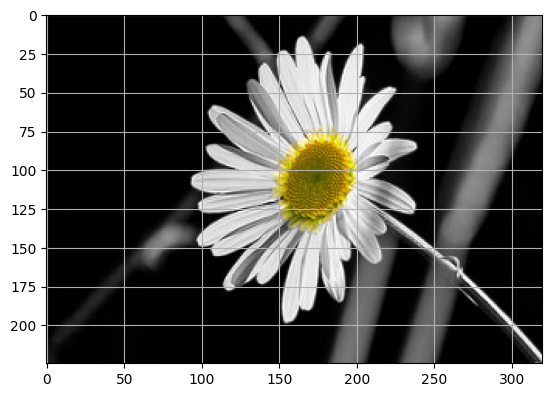

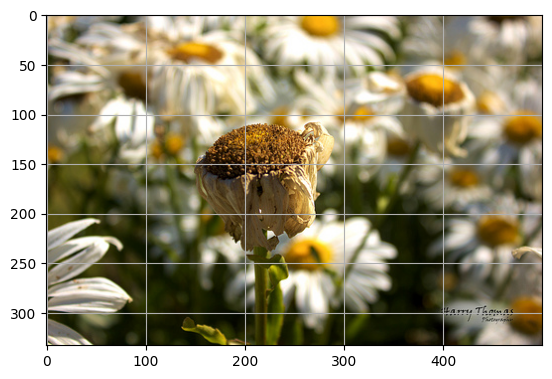

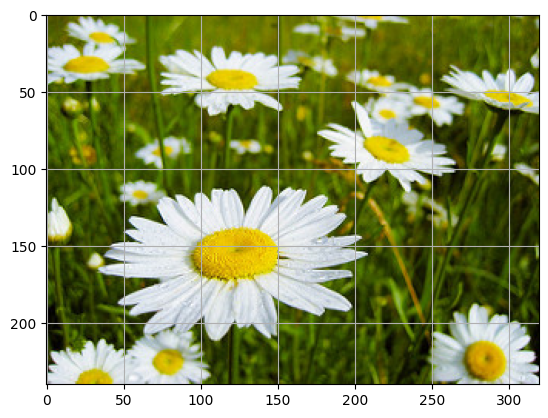

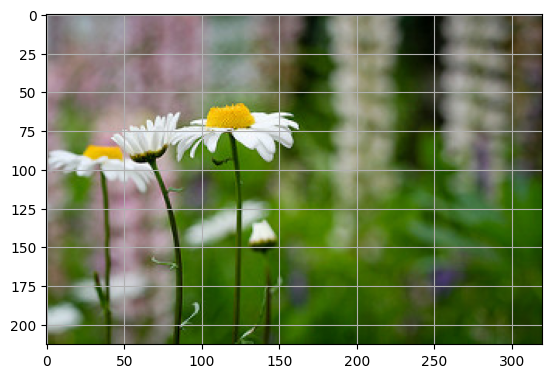

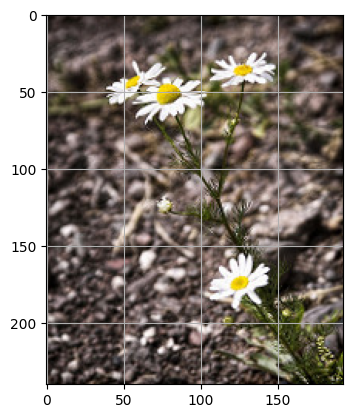

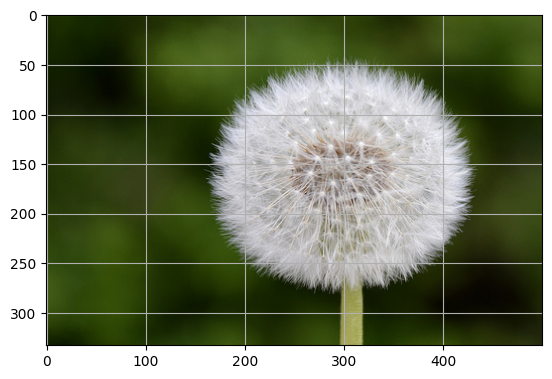

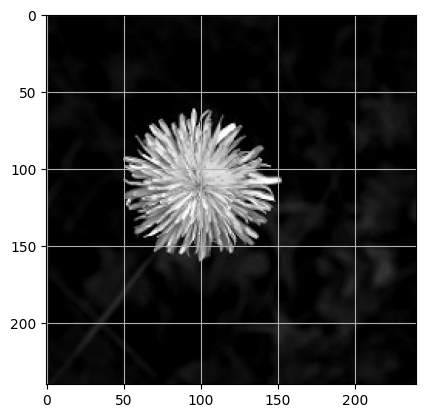

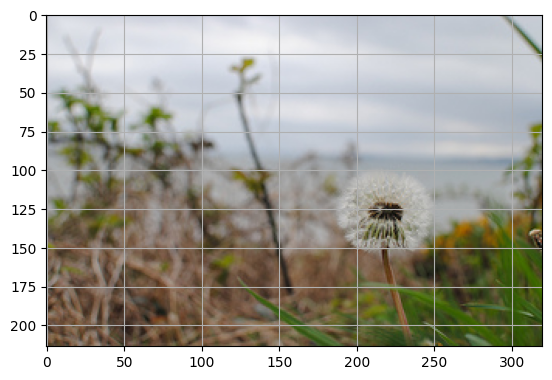

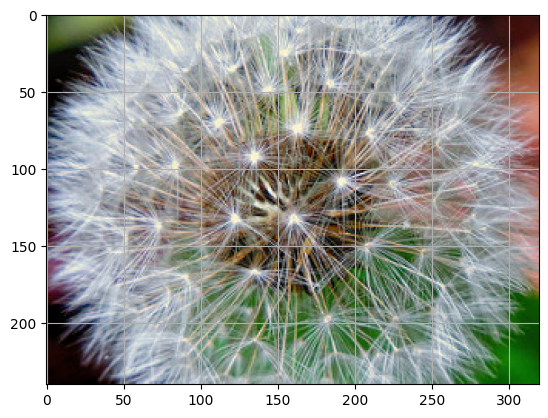

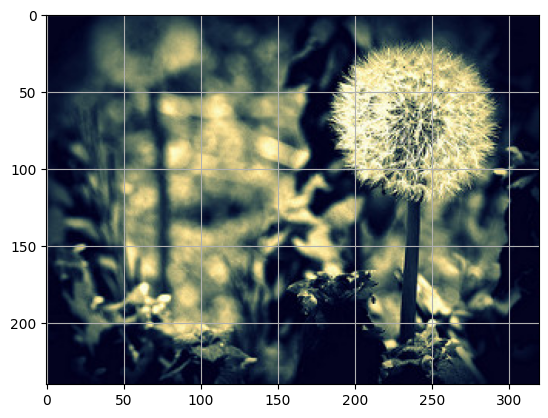

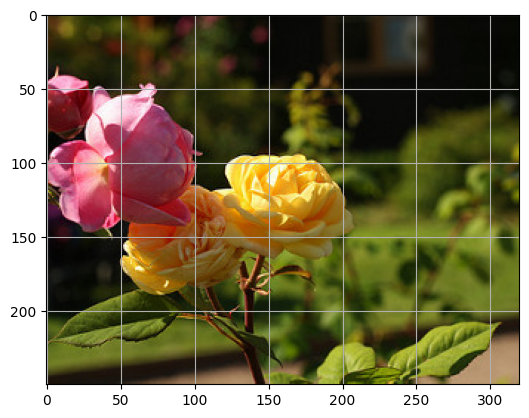

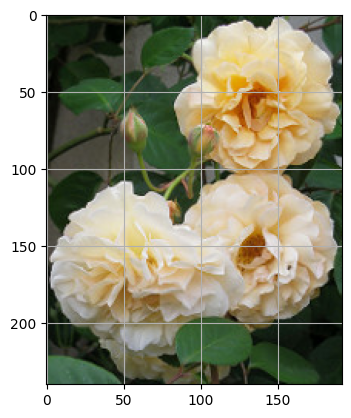

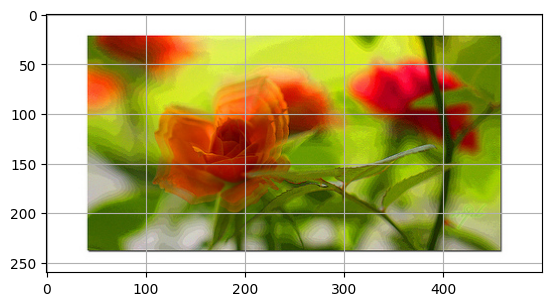

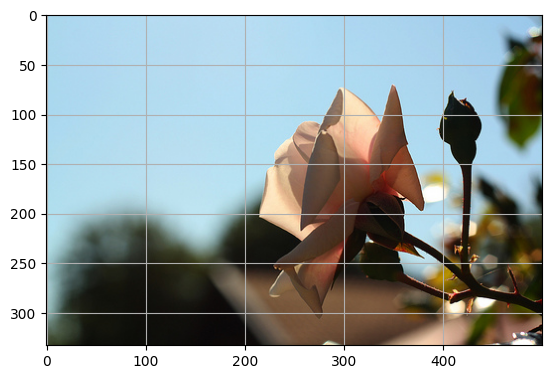

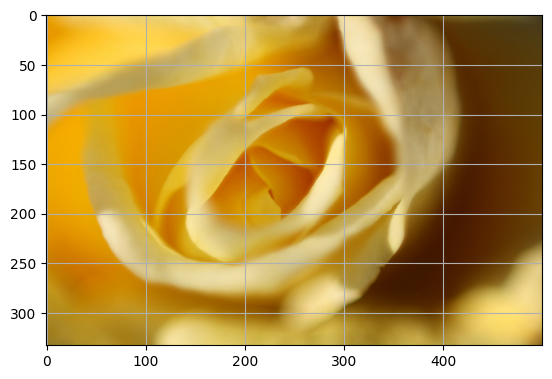

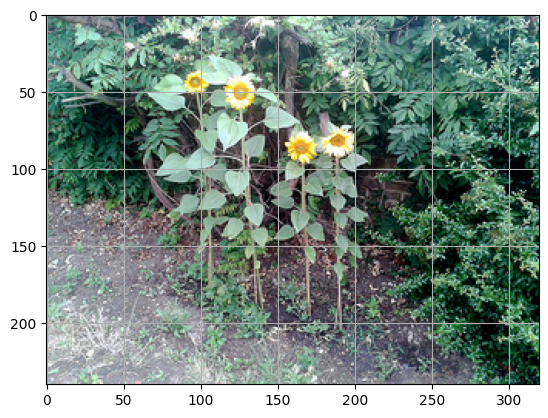

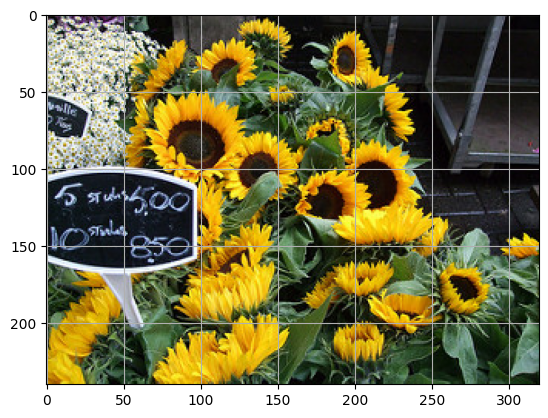

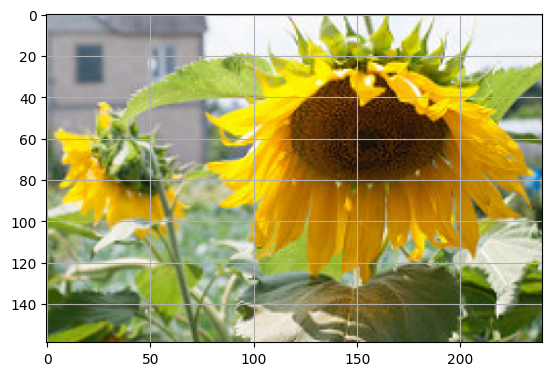

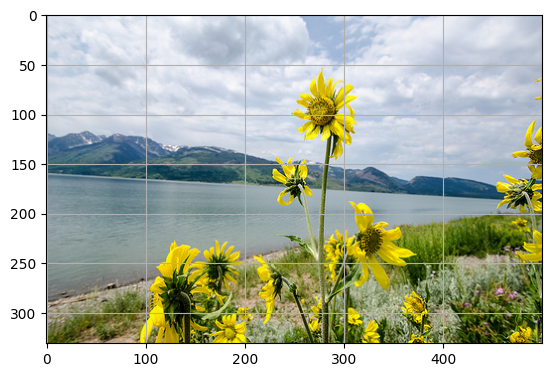

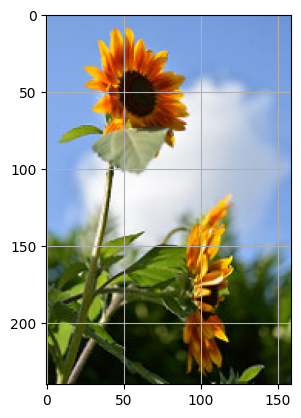

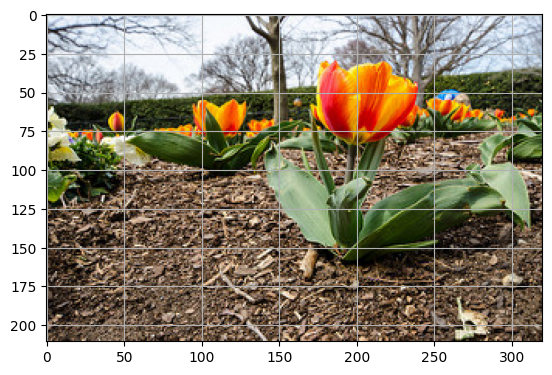

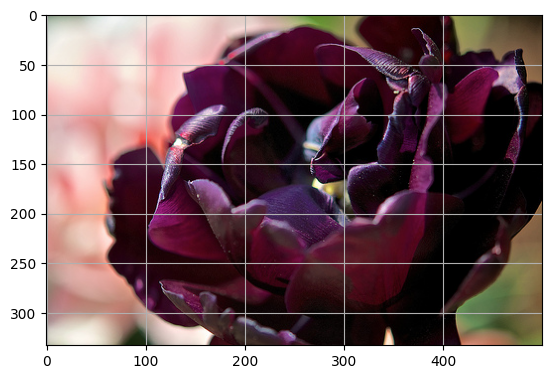

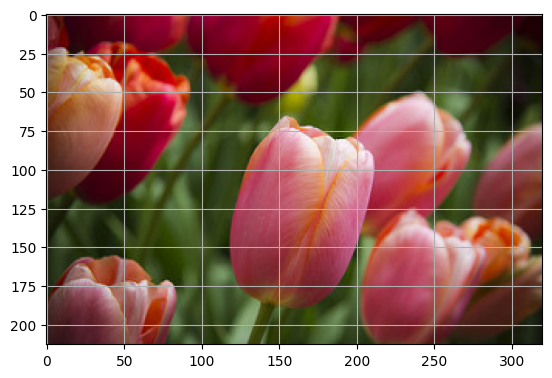

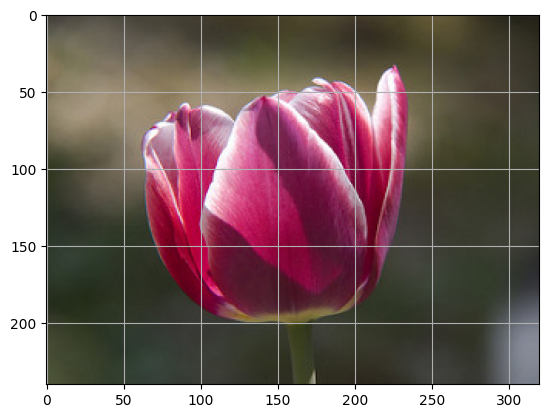

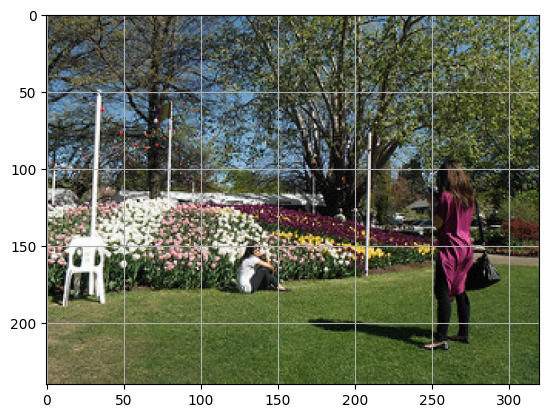

In [7]:
for i in range(5):
  for k in range(5):
    pixel_matrix = plt.imread(f'{fold}/{flowers_name[i]}/{img_path[i][k]}')
    plt.imshow(pixel_matrix)
    plt.grid()
    plt.show()

In [8]:
len(train_daisy_names)

764

# Making Categories

daisy -> 0

dandelion -> 1

rose -> 2

sunflower -> 3

tulip -> 4

In [9]:
categories = []
for i in range(5):
  print(len(img_path[i]))
  for k in range(len(img_path[i])):
    categories.append(i)




764
1062
784
733
984


In [10]:
len(categories)

4327

In [11]:
features = []

In [12]:
# Storing all images in one place
for i in range(5):
  for k in range(len(img_path[i])):
    v = f'{fold}/{flowers_name[i]}/{img_path[i][k]}'
    features.append(v)


In [13]:
len(features)

4327

In [14]:
features

['/content/drive/MyDrive/DST_project_2/Daisy/9299302012_958c70564c_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9346508462_f0af3163f4.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9922116524_ab4a2533fe_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9321854387_5f77c926cb_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9467543719_c4800becbb_m.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9204730092_a7f2182347.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9515186037_3be48fe68f.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9496209717_25a6ebdab6_m.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/8489463746_a9839bf7e4.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9529916092_de70623523_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9350942387_5b1d043c26_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9244082319_b1f7e2d8b0_n.jpg',
 '/content/drive/MyDrive/DST_project_2/Daisy/9593034725_0062f0d24e_n.jpg',
 '/content/drive/MyDrive/DST_proj

In [15]:
df = pd.DataFrame({
    "feature": features,
    "target": categories
})

In [16]:
df.head()

feature  target
0  /content/drive/MyDrive/DST_project_2/Daisy/929...       0
1  /content/drive/MyDrive/DST_project_2/Daisy/934...       0
2  /content/drive/MyDrive/DST_project_2/Daisy/992...       0
3  /content/drive/MyDrive/DST_project_2/Daisy/932...       0
4  /content/drive/MyDrive/DST_project_2/Daisy/946...       0

In [17]:
df.tail()

feature  target
4322  /content/drive/MyDrive/DST_project_2/Tulip/100...       4
4323  /content/drive/MyDrive/DST_project_2/Tulip/121...       4
4324  /content/drive/MyDrive/DST_project_2/Tulip/112...       4
4325  /content/drive/MyDrive/DST_project_2/Tulip/125...       4
4326  /content/drive/MyDrive/DST_project_2/Tulip/113...       4

In [18]:
df.head()

feature  target
0  /content/drive/MyDrive/DST_project_2/Daisy/929...       0
1  /content/drive/MyDrive/DST_project_2/Daisy/934...       0
2  /content/drive/MyDrive/DST_project_2/Daisy/992...       0
3  /content/drive/MyDrive/DST_project_2/Daisy/932...       0
4  /content/drive/MyDrive/DST_project_2/Daisy/946...       0

# Converting image to array

In [19]:
# Creating a list to store image data
images = []
for image_path in features:
    img = load_img(image_path, target_size=(Image_Width, Image_Height))
    img_array = np.array(img)
    images.append(img_array)


In [20]:
# Convert the list of images to a numpy array
X = np.array(images)

# Convert target labels to categorical
y = to_categorical(df.target, num_classes=5)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


#CNN Model

In [21]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(500, activation='sigmoid'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(100, activation='sigmoid'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(5, activation='softmax')  # Output layer with 5 classes
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='RMSprop',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, verbose=2)




Epoch 1/10
109/109 - 18s - loss: 1.5631 - accuracy: 0.4276 - val_loss: 1.4410 - val_accuracy: 0.4134 - 18s/epoch - 165ms/step
Epoch 2/10
109/109 - 4s - loss: 1.2389 - accuracy: 0.5244 - val_loss: 1.3126 - val_accuracy: 0.4630 - 4s/epoch - 36ms/step
Epoch 3/10
109/109 - 4s - loss: 1.1145 - accuracy: 0.5724 - val_loss: 1.5074 - val_accuracy: 0.4480 - 4s/epoch - 35ms/step
Epoch 4/10
109/109 - 4s - loss: 1.0233 - accuracy: 0.6114 - val_loss: 1.4715 - val_accuracy: 0.4942 - 4s/epoch - 36ms/step
Epoch 5/10
109/109 - 4s - loss: 0.9469 - accuracy: 0.6383 - val_loss: 1.1658 - val_accuracy: 0.5589 - 4s/epoch - 35ms/step
Epoch 6/10
109/109 - 4s - loss: 0.8690 - accuracy: 0.6700 - val_loss: 1.0245 - val_accuracy: 0.6224 - 4s/epoch - 35ms/step
Epoch 7/10
109/109 - 4s - loss: 0.8047 - accuracy: 0.6920 - val_loss: 1.0561 - val_accuracy: 0.6270 - 4s/epoch - 36ms/step
Epoch 8/10
109/109 - 4s - loss: 0.7524 - accuracy: 0.7212 - val_loss: 1.0616 - val_accuracy: 0.6316 - 4s/epoch - 36ms/step
Epoch 9/10
10

In [22]:
predictions = model.predict(X_val)

28/28 [==============================] - 0s 7ms/step


In [23]:
predicted_labels = np.argmax(predictions, axis=1)

In [24]:
print(predicted_labels)

[4 1 2 4 3 1 3 0 1 1 2 2 1 4 0 1 1 3 2 4 3 1 0 2 1 1 4 2 1 1 2 1 0 4 2 2 1
 2 4 1 3 4 4 1 0 3 1 4 0 3 4 3 4 3 1 4 1 1 4 2 0 2 0 1 4 3 1 4 1 1 1 1 1 2
 4 1 1 1 0 0 1 3 2 2 3 3 2 1 1 4 4 2 1 4 1 2 4 0 4 4 4 4 1 4 1 3 2 1 1 1 1
 1 2 1 4 3 4 0 1 4 1 1 1 0 4 1 4 4 4 2 0 2 4 1 1 4 4 1 1 1 4 1 1 4 4 1 4 2
 2 4 4 4 0 3 2 1 4 4 4 1 1 1 2 2 3 3 1 2 1 1 4 1 4 2 1 4 1 4 4 1 4 4 2 4 1
 1 4 1 1 1 1 3 1 0 3 1 2 2 4 1 1 4 1 1 2 3 3 0 1 4 4 0 2 4 2 1 1 1 4 4 2 1
 4 2 4 1 4 2 1 4 0 1 1 4 1 3 1 3 4 0 4 2 4 3 2 0 3 1 4 3 1 4 2 1 1 0 3 4 2
 1 0 4 1 2 4 1 4 1 2 1 4 1 1 4 1 1 1 4 4 0 4 1 2 1 1 1 0 3 1 1 1 0 1 1 1 0
 1 0 4 1 1 1 4 1 4 3 1 3 1 4 2 4 1 4 1 1 1 1 2 1 4 2 2 1 2 1 2 1 1 3 1 1 1
 2 2 3 4 4 2 3 1 0 2 4 1 4 4 0 1 1 4 1 3 4 2 1 0 4 1 1 1 1 4 4 3 1 1 4 3 4
 4 3 4 4 0 4 2 1 4 2 0 0 1 4 4 1 2 2 1 1 2 4 4 2 4 4 2 0 1 4 2 4 4 3 1 3 0
 1 1 1 1 1 1 4 4 2 3 2 2 0 4 4 4 4 1 1 1 1 4 1 4 1 3 1 2 0 1 2 0 1 1 4 1 4
 3 1 0 1 1 1 1 1 4 4 1 3 3 2 1 1 1 2 1 4 3 1 2 4 2 0 1 0 4 2 3 4 0 1 0 4 3
 4 1 1 2 1 4 4 4 2 1 4 2 

In [25]:
true_labels = np.argmax(y_val, axis=1)

In [26]:
print(true_labels)

[2 1 2 4 3 1 3 0 1 1 2 2 0 3 0 1 1 3 4 2 3 2 0 1 1 1 1 2 1 1 1 0 0 4 2 4 1
 2 2 0 3 4 4 1 1 3 1 2 0 3 1 3 4 3 1 0 2 0 4 2 0 3 0 3 2 3 1 0 1 1 1 0 1 2
 4 1 0 0 0 0 1 3 2 4 3 3 4 1 1 4 4 2 1 2 1 2 3 0 4 2 2 0 3 2 1 3 4 1 4 3 1
 1 2 1 4 3 4 1 1 2 1 0 1 0 4 1 4 4 0 2 0 2 4 1 0 4 2 0 1 1 4 1 3 4 4 1 4 2
 2 1 0 3 2 3 4 4 4 2 4 1 0 0 2 0 3 3 0 2 1 1 2 0 4 2 1 4 1 4 4 4 1 4 2 4 1
 1 2 1 1 1 1 3 1 0 3 1 2 2 3 1 1 2 1 0 1 3 3 0 1 4 4 0 4 4 2 1 3 1 4 4 2 1
 3 1 4 0 2 0 0 4 0 1 4 4 1 3 1 3 2 0 3 4 4 3 2 0 4 1 2 3 1 4 2 1 1 3 3 2 4
 4 0 4 1 2 4 1 4 0 4 1 0 0 0 4 3 4 1 4 4 0 4 1 4 1 4 1 2 3 2 0 4 0 1 1 1 0
 0 0 4 1 3 1 2 0 3 3 3 3 1 0 2 4 3 2 1 3 2 1 0 2 4 2 2 0 0 0 2 1 0 3 3 3 0
 2 2 3 4 4 4 3 1 4 4 4 1 4 2 0 3 0 2 1 3 4 4 3 0 2 0 1 0 1 0 2 3 1 1 0 3 3
 4 3 1 4 0 4 2 1 4 4 0 2 1 1 0 1 2 2 1 1 1 4 1 2 2 4 2 0 0 4 0 0 0 3 1 3 0
 1 3 1 0 4 2 2 3 2 3 1 4 0 2 2 4 4 3 1 1 3 4 1 1 1 3 1 2 1 1 2 0 1 1 0 1 4
 3 1 0 0 0 4 3 1 2 4 1 4 3 2 1 1 1 2 1 4 3 1 2 0 0 1 4 0 4 4 3 4 0 1 0 3 3
 4 0 1 0 0 2 2 4 2 1 4 4 

In [28]:
#Comparing result and actual value
Comparison_df = pd.DataFrame({
    'Actual_Category' : true_labels,
    'Predicted_Category' : predicted_labels
})

In [30]:
Comparison_df.head(10)

Actual_Category  Predicted_Category
0                2                   4
1                1                   1
2                2                   2
3                4                   4
4                3                   3
5                1                   1
6                3                   3
7                0                   0
8                1                   1
9                1                   1

# Accuracy Score

In [27]:
accuracy = accuracy_score(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels, target_names=flowers_name)
confusion = confusion_matrix(true_labels, predicted_labels)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.625866050808314
Classification Report:
               precision    recall  f1-score   support

       Daisy       0.83      0.39      0.53       165
   Dandelion       0.60      0.88      0.72       232
        Rose       0.60      0.48      0.53       155
   Sunflower       0.90      0.54      0.67       132
       Tulip       0.52      0.70      0.60       182

    accuracy                           0.63       866
   macro avg       0.69      0.60      0.61       866
weighted avg       0.67      0.63      0.62       866

Confusion Matrix:
 [[ 64  66  11   0  24]
 [  5 205   8   2  12]
 [  5  13  75   2  60]
 [  2  35   4  71  20]
 [  1  22  28   4 127]]


# Creating Pickle File

In [47]:
pickle.dump(model, open('flower_model.pkl', 'wb'))

# Conclusion
We've succesfully created a neural network which can help us classify the flowers from the flowers like Daisy, Dandelion, Rose, Sunflower, Tulip.